In [36]:
%matplotlib inline

In [52]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from pyamg.relaxation.relaxation import jacobi
save = 1

In [53]:
A_dense = [[1,-1,0,0,0,0,0],[-1,2,-1,0,0,0,0],[0,-1,2,-1,0,0,0],[0,0,-1,2,-1,0,0],[0,0,0,-1,2,-1,0], [0,0,0,0,-1,2,-1],[0,0,0,0,0,-1,1]]
A = csr_matrix(A_dense, dtype=float)
x_true = np.ones(A.shape[0],)
b = A.dot(x_true)
x = np.copy(x_true)
x[0] = -1
x[1] = 1
x[2] = -1
x[3] = 1
x[4] = -1
x[5] = 1
x[6] = -1

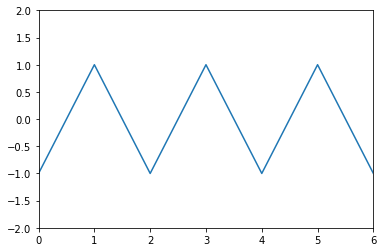

In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 6), ylim=(-2, 2))
xdata = np.arange(0, 7)
line, = ax.plot(xdata, x)

def update_plot(frame_num):
    if frame_num > 0:
        jacobi(A, x, b)
    line.set_data(xdata, x)
    
anim = FuncAnimation(fig, update_plot, frames=5, interval=1000)

In [55]:
if save:
    anim.save('jacobi_1d.mp4', writer='ffmpeg', fps=1, dpi=100)

In [56]:
from IPython.display import HTML
HTML(anim.to_html5_video())